In [1]:
import pandas as pd
# Load Titanic dataset (update path as needed)
df = pd.read_csv("titanic.csv")
# Preview the data
df.head()


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [6]:
df.isnull().sum()


pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [8]:
df['age'] = df['age'].fillna(df['age'].median())


In [9]:
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])


In [15]:

df.drop(columns=['body'],inplace=True)


In [17]:
df['boat'] = df['boat'].fillna('No Boat')
df['Has_Boat'] = (df['boat'] != 'No Boat').astype(int)


In [21]:

df = df.drop(columns=['home.dest'])


In [24]:
assert df.isnull().sum().sum()==0

In [25]:
df.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
boat        0
Has_Boat    0
dtype: int64

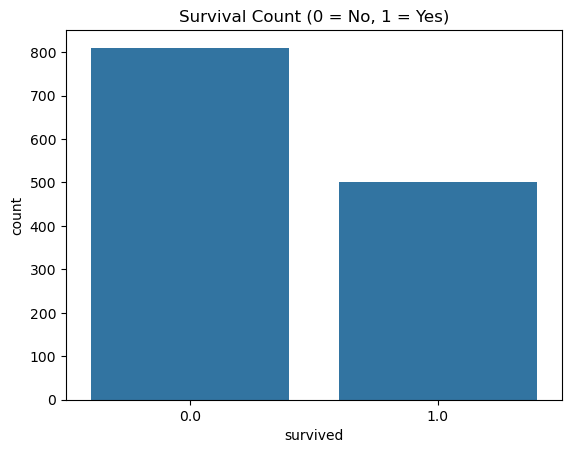

In [35]:
#survival count
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()


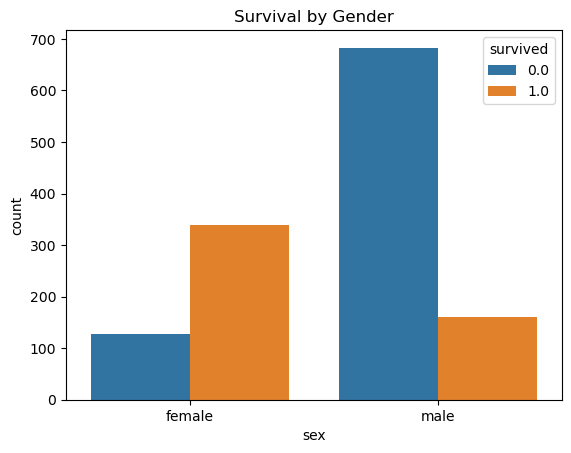

In [36]:
#survival by Gender
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()


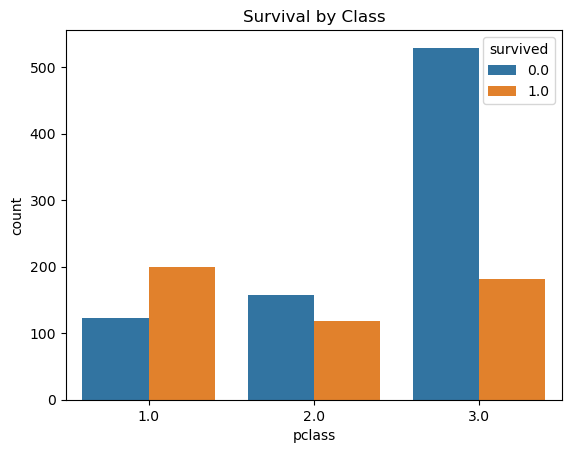

In [37]:
#Survival by class
sns.countplot(x='pclass', hue='survived', data=df)
plt.title("Survival by Class")
plt.show()


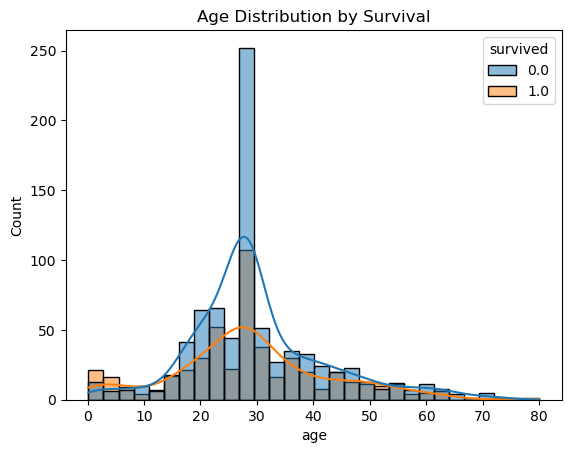

In [39]:
#Age distribution by survival
sns.histplot(data=df, x='age', hue='survived', bins=30, kde=True)
plt.title("Age Distribution by Survival")
plt.show()


In [46]:
#encode categorical features
df['sex'] = df['sex'].astype('category').cat.codes
df['embarked'] = df['embarked'].astype('category').cat.codes


In [47]:
#compute correlation matrix
# Select only numeric columns for heatmap
numeric_df = df.select_dtypes(include='number')
# Compute correlation matrix
corr_matrix = numeric_df.corr()


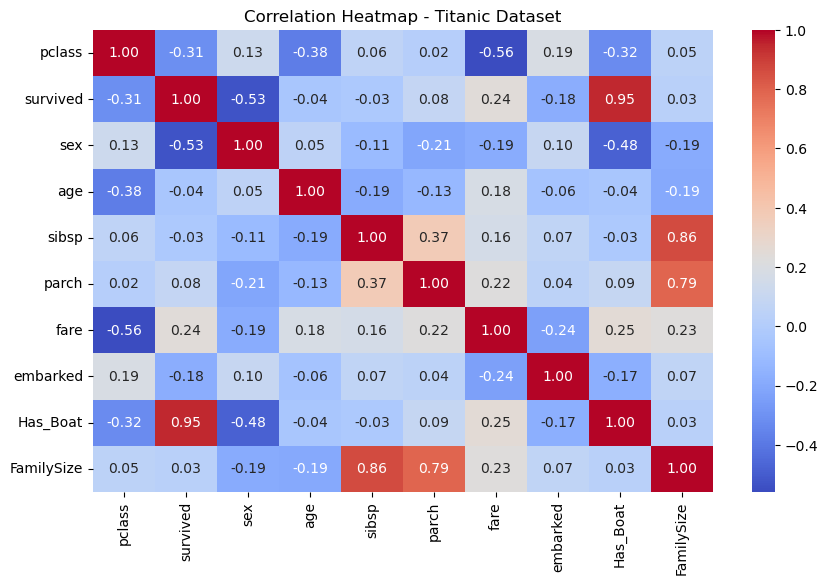

In [50]:
#
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap - Titanic Dataset")
plt.show()
